In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
dataset=sklearn.datasets.load_boston()
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
dataframe=pd.DataFrame(dataset.data)
dataframe.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
dataframe['PRICE']=dataset.target

In [5]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# CHECKING FOR MISSING VALUES
dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
# STATISTICAL MEASURE OF DATASET
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# SPLITTING TARGET DATA FROM WHOLE DATA
# dataframe=dataframe.drop(['price'], axis=1)
X=dataframe.drop(['PRICE'], axis=1)
Y=dataframe["PRICE"]

In [9]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
393,8.64476,0.0,18.10,0.0,0.693,6.193,92.6,1.7912,24.0,666.0,20.2,396.90,15.17
190,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5.0,398.0,15.2,377.68,5.10
449,7.52601,0.0,18.10,0.0,0.713,6.417,98.3,2.1850,24.0,666.0,20.2,304.21,19.31
408,7.40389,0.0,18.10,0.0,0.597,5.617,97.9,1.4547,24.0,666.0,20.2,314.64,26.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.19657,22.0,5.86,0.0,0.431,6.226,79.2,8.0555,7.0,330.0,19.1,376.14,10.15
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98
74,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42


In [10]:
model =XGBRegressor()


In [11]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [12]:
# ACCURACY FOR PREDICTION OF TRAINING DATA
trainingdata_prediction=model.predict(X_train)


In [13]:
# R SQUARED ERROR
S1= metrics.r2_score(Y_train,trainingdata_prediction)

# MEAN ABSOLUTE ERROR
S2=metrics.mean_absolute_error(Y_train,trainingdata_prediction)

print("R SQUARED ERROR: ", S1)
print("MEAN ABSOLUTE ERROR: ", S2)

R SQUARED ERROR:  0.9999983729414694
MEAN ABSOLUTE ERROR:  0.008670237643570567


In [14]:
# ACCURACY FOR PREDICTION OF TEST DATA
testdata_prediction=model.predict(X_test)

In [15]:
# R SQUARED ERROR
Score1= metrics.r2_score(Y_test,testdata_prediction)

# MEAN ABSOLUTE ERROR
Score2=metrics.mean_absolute_error(Y_test,testdata_prediction)

print("R SQUARED ERROR: ", Score1)
print("MEAN ABSOLUTE ERROR: ", Score2)

R SQUARED ERROR:  0.835391122973652
MEAN ABSOLUTE ERROR:  2.344117398011057


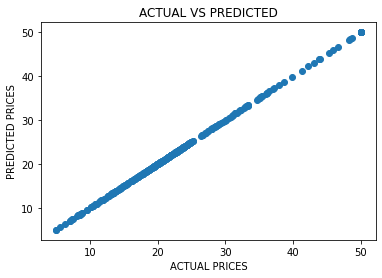

In [16]:
# VISUALLIZING ACTUAL PRICES AND PREDICTED PRICES
# TRAINING DATA
plt.scatter(Y_train,trainingdata_prediction)
plt.xlabel("ACTUAL PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("ACTUAL VS PREDICTED")
plt.show()

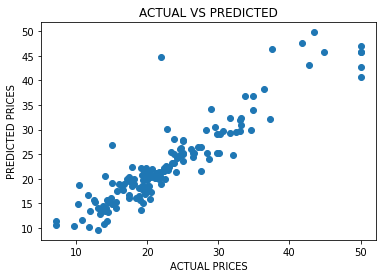

In [17]:
# VISUALLIZING ACTUAL PRICES AND PREDICTED PRICES
# TESTING DATA
plt.scatter(Y_test,testdata_prediction)
plt.xlabel("ACTUAL PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("ACTUAL VS PREDICTED")
plt.show()